<a href="https://colab.research.google.com/github/Jhonan01/calculation-of-the-position-of-the-claw-of-a-robot/blob/main/calculation_of_the_position_of_the_claw_of_a_robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
np.set_printoptions(formatter={'float':lambda x: '%+01.2f ' % x})

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Representação Denavit-Hartenberg:  [[+0.43  -0.25  +0.87  +34.64 ]
 [+0.75  -0.43  -0.50  +60.00 ]
 [+0.50  +0.87  +0.00  +110.00 ]
 [+0.00  +0.00  +0.00  +1.00 ]]
X:  34.641016151377556 Y:  60.0 Z:  110.0


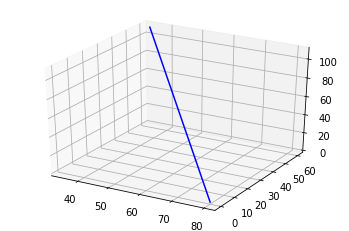

In [ ]:
import numpy as np

class Robo:
  def __init__(self, links, a, alfa, d):
    #links
    
    self.a = a             #a_i
    self.alfa = alfa       #alfa_i
    self.d = d             #d_i

    self.r11 = []
    self.r12 = []
    self.r13 = []
    self.r14 = []

    self.r21 = []
    self.r22 = []
    self.r23 = []
    self.r24 = []

    self.r31 = []
    self.r32 = []
    self.r33 = []
    self.r34 = []

    self.r41 = []
    self.r42 = []
    self.r43 = []
    self.r44 = []

    self.A = []

  def move(self, theta):
    for i in range(len(theta)):
      self.r11 = np.cos(theta[i])
      self.r12 = -np.sin(theta[i])*np.cos(self.alfa[i])
      self.r13 = np.sin(theta[i])*np.sin(self.alfa[i])
      self.r14 = np.cos(theta[i])*self.a[i]

      self.r21 = np.sin(theta[i])
      self.r22 = np.cos(theta[i])*np.cos(self.alfa[i])
      self.r23 = -np.cos(theta[i])*np.sin(self.alfa[i])
      self.r24 = np.sin(theta[i])*self.a[i]

      self.r31 = 0
      self.r32 = np.sin(self.alfa[i])
      self.r33 = np.cos(self.alfa[i])
      self.r34 = self.d[i]

      self.r41 = 0
      self.r42 = 0
      self.r43 = 0
      self.r44 = 1

      self.A.append([[self.r11, self.r12, self.r13, self.r14], \
           [self.r21, self.r22, self.r23, self.r24], \
           [self.r31, self.r32, self.r33, self.r34], \
           [self.r41, self.r42, self.r43, self.r44]])
      self.A[i] = np.array(self.A[i])

    for j in range(len(theta)-1):
      self.A[j] = np.dot(self.A[j] , self.A[j+1])

    return self.A[j]

a = [0, 80]
alfa = [np.deg2rad(90), 0]
d = [70, 0]

theta = [np.deg2rad(60), np.deg2rad(30)]  #Angulo que vai mudar a posição da garra #Transformando de graus para radianos

r = Robo(2, a, alfa, d) #Passar para o construtor a quantidade de links

print('Representação Denavit-Hartenberg: ',r.move(theta))

print('X: ', r.A[0][0][3], 'Y: ',r.A[0][1][3], 'Z: ',r.A[0][2][3]) #coordenada em x do movimento da garra #coordenada em y do movimento da garra

figure = plt.figure()
grafic = figure.gca(projection='3d')

#posição inicial é (np.sum(a),0,0)
x = np.linspace(np.sum(a),r.A[0][0][3],10)   
y = np.linspace(0,r.A[0][1][3],10)
z = np.linspace(0,r.A[0][2][3],10)

grafic.plot(x,y,z, color='blue')

plt.show()
